In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
from textblob import TextBlob
from wordcloud import WordCloud
import re
import string
string.punctuation
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /Users/thomo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
stock = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/FAANG%20Stock%20news%20Sentiment%20Analysis/FAANG_STOCK_NEWS.csv")

In [7]:
stock.shape

(500, 9)

In [15]:
stockk.head()

,Unnamed: 0,ticker,date,time,headline,neg,neu,pos,compound
0,0,FB,2021-09-22,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,0.000,0.608,0.392,0.7003
1,1,FB,2021-09-22,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,0.167,0.833,0.000,-0.3400
2,2,FB,2021-09-22,12:36AM,Facebook wraps up deals with Australian media ...,0.179,0.821,0.000,-0.3400
3,3,FB,2021-09-22,12:27AM,Facebook wraps up deals with Australia media f...,0.000,1.000,0.000,0.0000
4,4,FB,2021-09-21,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,0.099,0.659,0.242,0.3818


In [16]:
stock = stock.drop('Unnamed: 0', 1)
stock.head()

<ipython-input-16-6b13e973fca3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  stock = stock.drop('Unnamed: 0', 1)


,ticker,date,time,headline,neg,neu,pos,compound
0,FB,2021-09-22,06:30AM,2 Growth Stocks to Buy Hand Over Fist If the M...,0.000,0.608,0.392,0.7003
1,FB,2021-09-22,02:23AM,UPDATE 1-Facebook wraps up deals with Australi...,0.167,0.833,0.000,-0.3400
2,FB,2021-09-22,12:36AM,Facebook wraps up deals with Australian media ...,0.179,0.821,0.000,-0.3400
3,FB,2021-09-22,12:27AM,Facebook wraps up deals with Australia media f...,0.000,1.000,0.000,0.0000
4,FB,2021-09-21,10:34PM,Facebook overpaid FTC fine as quid pro quo to ...,0.099,0.659,0.242,0.3818


In [17]:
stock.describe()

,neg,neu,pos,compound
count,500.000000,500.000000,500.000000,500.000000
mean,0.056344,0.822262,0.121406,0.100331
std,0.111799,0.171060,0.157284,0.346107
min,0.000000,0.306000,0.000000,-0.743000
25%,0.000000,0.706750,0.000000,0.000000
50%,0.000000,0.821000,0.000000,0.000000
75%,0.000000,1.000000,0.231000,0.307000
max,0.519000,1.000000,0.694000,0.941300


In [18]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    500 non-null    object 
 1   date      500 non-null    object 
 2   time      500 non-null    object 
 3   headline  500 non-null    object 
 4   neg       500 non-null    float64
 5   neu       500 non-null    float64
 6   pos       500 non-null    float64
 7   compound  500 non-null    float64
dtypes: float64(4), object(4)
memory usage: 31.4+ KB


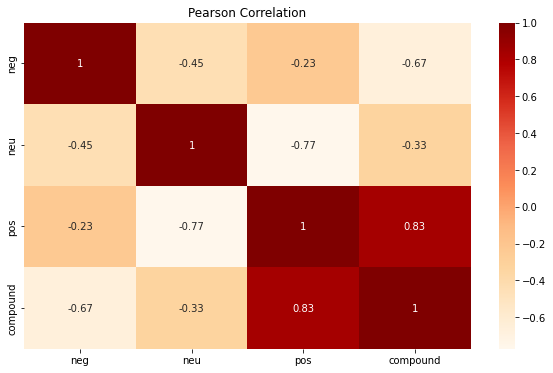

In [19]:
plt.figure(figsize = (10,6))
sns.heatmap(stock.corr(), annot = True, cmap = 'OrRd')
plt.title("Pearson Correlation")
plt.show()

In [20]:
headline = stock[['ticker', 'headline']]
headline.head()

,ticker,headline
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...
2,FB,Facebook wraps up deals with Australian media ...
3,FB,Facebook wraps up deals with Australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...


In [21]:
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

headline['clean_headline'] = headline['headline'].apply(lambda x:remove_punctuation(x))
headline.head()

<ipython-input-21-22a892ea6bbc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['clean_headline'] = headline['headline'].apply(lambda x:remove_punctuation(x))


,ticker,headline,clean_headline
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...


In [22]:
headline['headline_lower'] = headline['clean_headline'].apply(lambda x: x.lower())
headline.head()

<ipython-input-22-7945eb312206>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['headline_lower'] = headline['clean_headline'].apply(lambda x: x.lower())


,ticker,headline,clean_headline,headline_lower
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...


In [23]:
def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

headline['headline_tokenied'] = headline['headline_lower'].apply(lambda x: tokenization(x))
headline.head()

<ipython-input-23-26021d7ca492>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['headline_tokenied'] = headline['headline_lower'].apply(lambda x: tokenization(x))


,ticker,headline,clean_headline,headline_lower,headline_tokenied
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...,[2 growth stocks to buy hand over fist if the ...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...,[update 1facebook wraps up deals with australi...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...,[facebook wraps up deals with australian media...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...,[facebook wraps up deals with australia media ...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...,[facebook overpaid ftc fine as quid pro quo to...


In [24]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

headline['no_stopwords']= headline['headline_tokenied'].apply(lambda x:remove_stopwords(x))
headline.head()

<ipython-input-25-29d9fd641a03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['no_stopwords']= headline['headline_tokenied'].apply(lambda x:remove_stopwords(x))


,ticker,headline,clean_headline,headline_lower,headline_tokenied,no_stopwords
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...,[2 growth stocks to buy hand over fist if the ...,[2 growth stocks to buy hand over fist if the ...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...,[update 1facebook wraps up deals with australi...,[update 1facebook wraps up deals with australi...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...,[facebook wraps up deals with australian media...,[facebook wraps up deals with australian media...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...,[facebook wraps up deals with australia media ...,[facebook wraps up deals with australia media ...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...,[facebook overpaid ftc fine as quid pro quo to...,[facebook overpaid ftc fine as quid pro quo to...


In [26]:
porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

headline['headline_stemmed'] = headline['no_stopwords'].apply(lambda x: stemming(x))
headline.head()

<ipython-input-26-12b69a06b8d8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline['headline_stemmed'] = headline['no_stopwords'].apply(lambda x: stemming(x))


,ticker,headline,clean_headline,headline_lower,headline_tokenied,no_stopwords,headline_stemmed
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,2 Growth Stocks to Buy Hand Over Fist If the M...,2 growth stocks to buy hand over fist if the m...,[2 growth stocks to buy hand over fist if the ...,[2 growth stocks to buy hand over fist if the ...,[2 growth stocks to buy hand over fist if the ...
1,FB,UPDATE 1-Facebook wraps up deals with Australi...,UPDATE 1Facebook wraps up deals with Australia...,update 1facebook wraps up deals with australia...,[update 1facebook wraps up deals with australi...,[update 1facebook wraps up deals with australi...,[update 1facebook wraps up deals with australi...
2,FB,Facebook wraps up deals with Australian media ...,Facebook wraps up deals with Australian media ...,facebook wraps up deals with australian media ...,[facebook wraps up deals with australian media...,[facebook wraps up deals with australian media...,[facebook wraps up deals with australian media...
3,FB,Facebook wraps up deals with Australia media f...,Facebook wraps up deals with Australia media f...,facebook wraps up deals with australia media f...,[facebook wraps up deals with australia media ...,[facebook wraps up deals with australia media ...,[facebook wraps up deals with australia media ...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,Facebook overpaid FTC fine as quid pro quo to ...,facebook overpaid ftc fine as quid pro quo to ...,[facebook overpaid ftc fine as quid pro quo to...,[facebook overpaid ftc fine as quid pro quo to...,[facebook overpaid ftc fine as quid pro quo to...


In [27]:
df = headline[['ticker', 'clean_headline']]
df.head()

,ticker,clean_headline
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...
1,FB,UPDATE 1Facebook wraps up deals with Australia...
2,FB,Facebook wraps up deals with Australian media ...
3,FB,Facebook wraps up deals with Australia media f...
4,FB,Facebook overpaid FTC fine as quid pro quo to ...


In [28]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['subjectivity'] = df['clean_headline'].apply(getSubjectivity)
df['polarity'] = df['clean_headline'].apply(getPolarity)
df.head()

<ipython-input-28-9984b15e0922>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity'] = df['clean_headline'].apply(getSubjectivity)
<ipython-input-28-9984b15e0922>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['clean_headline'].apply(getPolarity)


,ticker,clean_headline,subjectivity,polarity
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,0.0,0.000000
1,FB,UPDATE 1Facebook wraps up deals with Australia...,0.0,0.000000
2,FB,Facebook wraps up deals with Australian media ...,0.0,0.000000
3,FB,Facebook wraps up deals with Australia media f...,0.0,0.000000
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,0.5,0.416667


In [29]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['polarity'].apply(getSentiment)
df.head()

<ipython-input-29-112fa13556eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['polarity'].apply(getSentiment)


,ticker,clean_headline,subjectivity,polarity,sentiment
0,FB,2 Growth Stocks to Buy Hand Over Fist If the M...,0.0,0.000000,Neutral
1,FB,UPDATE 1Facebook wraps up deals with Australia...,0.0,0.000000,Neutral
2,FB,Facebook wraps up deals with Australian media ...,0.0,0.000000,Neutral
3,FB,Facebook wraps up deals with Australia media f...,0.0,0.000000,Neutral
4,FB,Facebook overpaid FTC fine as quid pro quo to ...,0.5,0.416667,Positive


In [30]:
df["sentiment"].value_counts()

Neutral     272
Positive    173
Negative     55
Name: sentiment, dtype: int64

In [31]:
nl_headline = df[df.sentiment == 'Neutral']
nl_headline = nl_headline['clean_headline']
nl_headline.head()

0    2 Growth Stocks to Buy Hand Over Fist If the M...
1    UPDATE 1Facebook wraps up deals with Australia...
2    Facebook wraps up deals with Australian media ...
3    Facebook wraps up deals with Australia media f...
7    Facebook says Wall Street Journal report alleg...
Name: clean_headline, dtype: object

In [32]:
p_headline = df[df.sentiment == 'Positive']
p_headline = p_headline['clean_headline']
p_headline.head()

4     Facebook overpaid FTC fine as quid pro quo to ...
5     Is GBTC Stock A Good Buy As Bitcoin Slumps Aft...
6     Facebook Oversight Board to Review Special Rul...
8      These Are The 5 Best Stocks To Buy And Watch Now
13    Top Research Reports for Facebook Walmart  Nov...
Name: clean_headline, dtype: object

In [33]:
n_headline = df[df.sentiment == 'Negative']
n_headline = n_headline['clean_headline']
n_headline.head()

22    Facebook spent over 13 billion on safety secur...
23    Facebook spent over 13 bln on safety security ...
28    Facebook Says It Has Spent 13 Billion on Safet...
32    Why Apple Facebook Amazon and Other Tech Stock...
39    TikTok Parent Forced To Restrict Screen Time F...
Name: clean_headline, dtype: object

In [34]:
def score(x):
    return TextBlob(x).sentiment  
 
df['score'] = df['clean_headline'].apply(score)
df.score.head()

<ipython-input-34-f233684538ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['clean_headline'].apply(score)


0                   (0.0, 0.0)
1                   (0.0, 0.0)
2                   (0.0, 0.0)
3                   (0.0, 0.0)
4    (0.4166666666666667, 0.5)
Name: score, dtype: object

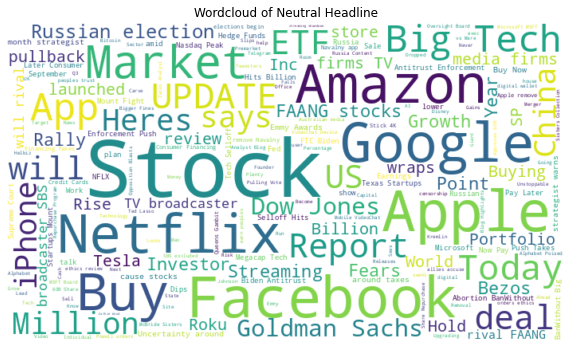

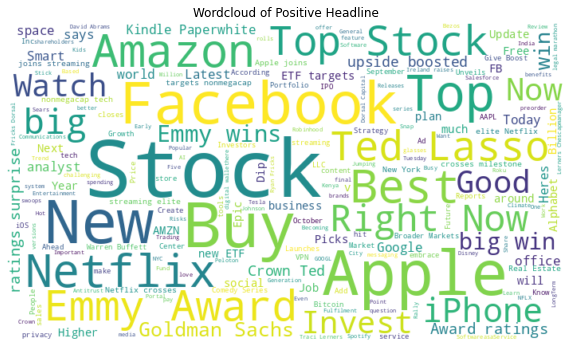

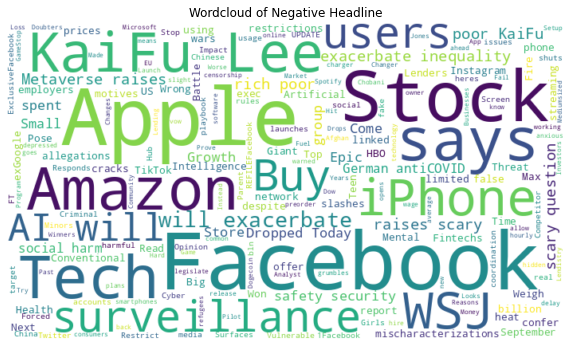

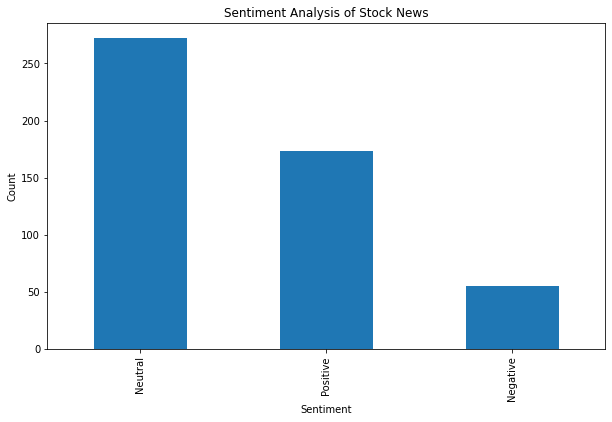

In [35]:
neutral = " ".join(df[df.sentiment == 'Neutral']['clean_headline'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(neutral)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Neutral Headline")
plt.axis('off')
plt.show()

positive = " ".join(df[df.sentiment == 'Positive']['clean_headline'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(positive)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Positive Headline")
plt.axis('off')
plt.show()

negative = " ".join(df[df.sentiment == 'Negative']['clean_headline'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(negative)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Negative Headline")
plt.axis('off')
plt.show()

df['sentiment'].value_counts()

plt.figure(figsize = (10,6))
plt.title("Sentiment Analysis of Stock News")
plt.xlabel("Sentiment")
plt.ylabel("Count")

df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [36]:
ticker_sentiment = df.groupby(['ticker', 'sentiment']).size().reset_index(name = 'Count')
print(ticker_sentiment)

   ticker sentiment  Count
0    AAPL  Negative     11
1    AAPL   Neutral     57
2    AAPL  Positive     32
3    AMZN  Negative     12
4    AMZN   Neutral     50
5    AMZN  Positive     38
6      FB  Negative     18
7      FB   Neutral     50
8      FB  Positive     32
9   GOOGL  Negative     10
10  GOOGL   Neutral     58
11  GOOGL  Positive     32
12   NFLX  Negative      4
13   NFLX   Neutral     57
14   NFLX  Positive     39


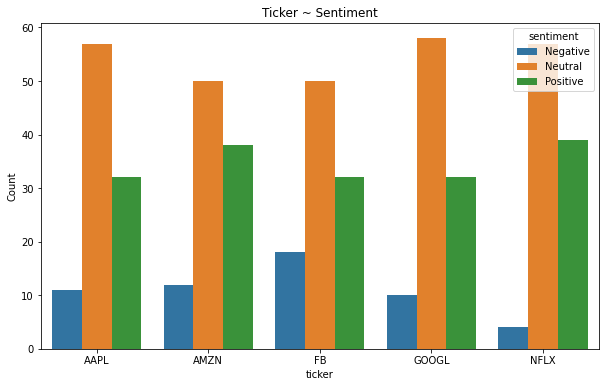

In [37]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'ticker', y = 'Count', hue = 'sentiment', data = ticker_sentiment)
plt.title("Ticker ~ Sentiment")
plt.show()